<a href="https://colab.research.google.com/github/AnejVollmeier/Analiza-trga-kriptovalut-in-napoved-gibanja-cen/blob/main/Kriptovalute_Anej_Vollmeier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analiza trga kriptovalut in napoved gibanja cen**

##**Pridobivanje podatkov**

*Pridobimo podatke o kriptovalutah iz spletnega CoinGecko API-ja. Podatki se združijo v DataFrame, iz katerega izberemo samo pomembne stolpce. Na koncu podatke shranimo v CSV datoteko, ki jo uporabimo pri nadaljnji obdelavi.*

In [67]:
import requests
import pandas as pd
import time

all_data = []

for page in range(1, 4):  # 3 strani * 100 = 300
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "eur",
        "order": "market_cap_desc",
        "per_page": 100,
        "page": page,
        "sparkline": "false",
        "price_change_percentage": "1h,24h,7d,30d,1y"
    }

    response = requests.get(url, params=params, timeout=30)

    # Zaščita pred preveč zahtevki
    if response.status_code == 429:
        print("Preveč zahtevkov – čakam 10 sekund …")
        time.sleep(10)
        response = requests.get(url, params=params, timeout=30)

    response.raise_for_status()
    all_data.extend(response.json())

    time.sleep(2)  # Obvezen zamik zaradi CoinGecko omejitev

df = pd.DataFrame(all_data)

columns = [
    "id",
    "symbol",
    "name",

    # Rang
    "market_cap_rank",
    "market_cap",
    "fully_diluted_valuation",

    # Cena
    "current_price",
    "total_volume",

    # Nihanje cen
    "high_24h",
    "low_24h",

    # Spremembe
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
    "price_change_percentage_7d_in_currency",
    "price_change_percentage_30d_in_currency",
    "price_change_percentage_1y_in_currency",
]

# Varno: izberi samo obstoječe stolpce
df = df.loc[:, [c for c in columns if c in df.columns]].copy()

df.to_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index=False,
)

df.head()

,id,symbol,name,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_1y_in_currency
0,bitcoin,btc,Bitcoin,1,1477914030539,1477914030539,74008.000000,4.568504e+10,76669.000000,73810.000000,-0.086902,-0.639779,-1.342442,-5.468768,-17.260478
1,ethereum,eth,Ethereum,2,300602413892,300602413892,2490.250000,2.437097e+10,2591.180000,2476.100000,-0.185638,-0.416292,-1.927182,-3.574503,-22.373786
2,tether,usdt,Tether,3,158513790106,163152230137,0.848459,7.539997e+10,0.850237,0.847426,-0.004482,-0.045128,-0.162055,-1.641046,-11.391366
3,binancecoin,bnb,BNB,4,99639295656,99639295656,723.280000,1.027059e+09,738.830000,719.340000,-0.073566,-0.665863,-0.583431,-4.207710,8.870651
4,ripple,xrp,XRP,5,95059488089,156911528816,1.570000,1.875850e+09,1.630000,1.570000,-0.170179,-0.768609,-2.694638,-17.592507,-22.464922


*Iz CSV datoteke naložimo podatke o kriptovalutah v DataFrame. Pri uvozu določimo ločilo, decimalni znak in stolpec **id** nastavimo kot indeks.*

In [68]:
df = pd.read_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index_col = 0
)
df.head()

,symbol,name,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_1y_in_currency
id,,,,,,,,,,,,,,
bitcoin,btc,Bitcoin,1,1477914030539,1477914030539,74008.000000,4.568504e+10,76669.000000,73810.000000,-0.086902,-0.639779,-1.342442,-5.468768,-17.260478
ethereum,eth,Ethereum,2,300602413892,300602413892,2490.250000,2.437097e+10,2591.180000,2476.100000,-0.185638,-0.416292,-1.927182,-3.574503,-22.373786
tether,usdt,Tether,3,158513790106,163152230137,0.848459,7.539997e+10,0.850237,0.847426,-0.004482,-0.045128,-0.162055,-1.641046,-11.391366
binancecoin,bnb,BNB,4,99639295656,99639295656,723.280000,1.027059e+09,738.830000,719.340000,-0.073566,-0.665863,-0.583431,-4.207710,8.870651
ripple,xrp,XRP,5,95059488089,156911528816,1.570000,1.875850e+09,1.630000,1.570000,-0.170179,-0.768609,-2.694638,-17.592507,-22.464922


##**Predprocesiranje podatkov**

*`df.shape` --> preverimo dimenzije DataFrame-a, torej število vrstic in stolpcev.*

In [69]:
df.shape

(300, 14)

*`df.info()` --> prikaže osnovne informacije o DataFrame-u, kot so imena stolpcev, tipi podatkov in število manjkajočih vrednosti.*

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, bitcoin to astherus-usdf
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   symbol                                   300 non-null    object 
 1   name                                     300 non-null    object 
 2   market_cap_rank                          300 non-null    int64  
 3   market_cap                               300 non-null    int64  
 4   fully_diluted_valuation                  300 non-null    int64  
 5   current_price                            300 non-null    float64
 6   total_volume                             292 non-null    float64
 7   high_24h                                 298 non-null    float64
 8   low_24h                                  298 non-null    float64
 9   price_change_percentage_1h_in_currency   297 non-null    float64
 10  price_change_percentage_24h_in_currency

*`df.isnull().sum()`-->prikaže število manjkajočih vrednosti v vsakem stolpcu DataFrame-a*

In [71]:
df.isnull().sum()

,0
symbol,0
name,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,8
high_24h,2
low_24h,2
price_change_percentage_1h_in_currency,3


*Odstranimo stolpce, ki niso pomembni za nadaljnjo analizo ali vsebujejo preveč manjkajočih vrednosti.*

*  symbol(ni pomemben)
*   name(ni pomemben)
*   price_change_percentage_1y_in_currency(prevec mankajočih vrednosti)





In [72]:
df = df.drop(columns=[
    "symbol",
    "name",
    "price_change_percentage_1y_in_currency",
])

df.head(3)

,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency
id,,,,,,,,,,,
bitcoin,1,1477914030539,1477914030539,74008.000000,4.568504e+10,76669.000000,73810.000000,-0.086902,-0.639779,-1.342442,-5.468768
ethereum,2,300602413892,300602413892,2490.250000,2.437097e+10,2591.180000,2476.100000,-0.185638,-0.416292,-1.927182,-3.574503
tether,3,158513790106,163152230137,0.848459,7.539997e+10,0.850237,0.847426,-0.004482,-0.045128,-0.162055,-1.641046


*Izberemo vse številske stolpce in manjkajoče vrednosti zapolnimo z mediano. Nato preverimo, da v DataFrame-u ni več manjkajočih podatkov*

*   `median()`--> srednja vrednost v urejenem naboru podatkov



In [73]:
num = df.select_dtypes(exclude=object).columns
df[num] = df[num].fillna(df[num].median())

df.isnull().sum()

,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,0
high_24h,0
low_24h,0
price_change_percentage_1h_in_currency,0
price_change_percentage_24h_in_currency,0
price_change_percentage_7d_in_currency,0


*Dodamo novo lastnost, ki meri relativno 24-urno volatilnost kriptovalut. S tem želimo bolje opisati, kako močno se cena posamezne kriptovalute spreminja glede na njeno trenutno vrednost.*

In [74]:
# Relativno 24h nihanje cen
df["range_24h_rel"] = (df["high_24h"] - df["low_24h"]) / df["current_price"]

df.isnull().sum()

,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,0
high_24h,0
low_24h,0
price_change_percentage_1h_in_currency,0
price_change_percentage_24h_in_currency,0
price_change_percentage_7d_in_currency,0


*Standardiziramo številske podatke z uporabo* **StandardScaler**

In [75]:
from sklearn.preprocessing import StandardScaler

df[num] = StandardScaler().fit_transform(df[num])

df.head(3)

,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,range_24h_rel
id,,,,,,,,,,,,
bitcoin,-1.726287,16.757106,11.692326,4.185824,8.507010,4.346979,4.364783,0.013610,0.076206,-0.094778,0.093807,0.038631
ethereum,-1.714740,3.327620,2.284399,-0.108537,4.484327,-0.095454,-0.095943,-0.133840,0.140036,-0.169572,0.164588,0.046212
tether,-1.703193,1.706828,1.186031,-0.258016,14.115219,-0.250795,-0.250729,0.136695,0.246044,0.056205,0.236834,0.003313


##**Vizualizacija podatkov**

###**1. GRAF**

*Krožni diagram prikazuje, kolikšen delež celotne tržne kapitalizacije zavzema 5 največjih kriptovalut v primerjavi z vsemi ostalimi kriptovalutami skupaj.*

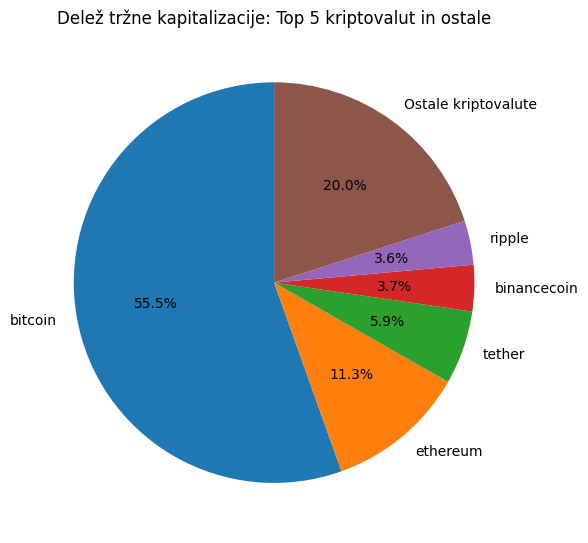

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index_col=0
)

top5 = df_raw.sort_values("market_cap", ascending=False).head(5)

total_market_cap = df_raw["market_cap"].sum()

top5_caps = top5["market_cap"]

others_cap = total_market_cap - top5_caps.sum()

labels = list(top5.index) + ["Ostale kriptovalute"]
sizes = list(top5_caps) + [others_cap]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Delež tržne kapitalizacije: Top 5 kriptovalut in ostale")
plt.tight_layout()
plt.show()

###**2. GRAF**

*Stolpčni graf prikazuje povprečna 24-urna nihanja cen kriptovalut v posameznih skupinah glede na njihov tržni rang.*

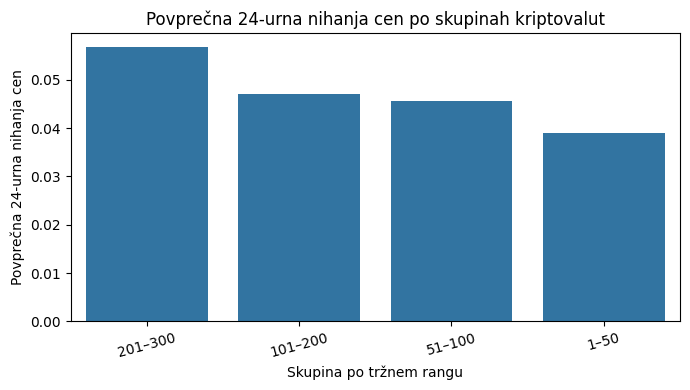

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Pripravimo podatke
df_rank = df.sort_values("market_cap_rank").copy()

# 2) Dodamo pozicijo
df_rank["rank_pos"] = np.arange(1, len(df_rank) + 1)

# 3) Ustvarimo skupine po rangu
df_rank["rank_group"] = "201–300"
df_rank.loc[df_rank["rank_pos"] <= 200, "rank_group"] = "101–200"
df_rank.loc[df_rank["rank_pos"] <= 100, "rank_group"] = "51–100"
df_rank.loc[df_rank["rank_pos"] <= 50,  "rank_group"] = "1–50"

# 4) Povprečna dnevna nihanja cen po skupinah
avg_change_by_rank = (
    df_rank.groupby("rank_group")["range_24h_rel"]
          .mean()
          .sort_values(ascending=False)
)

# 5) Barplot
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_change_by_rank.index, y=avg_change_by_rank.values)
plt.title("Povprečna 24-urna nihanja cen po skupinah kriptovalut")
plt.xlabel("Skupina po tržnem rangu")
plt.ylabel("Povprečna 24-urna nihanja cen")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

###**3. GRAF**

*Ta graf prikazuje korelacijsko matriko izbranih numeričnih lastnosti v obliki toplotnega zemljevida.*

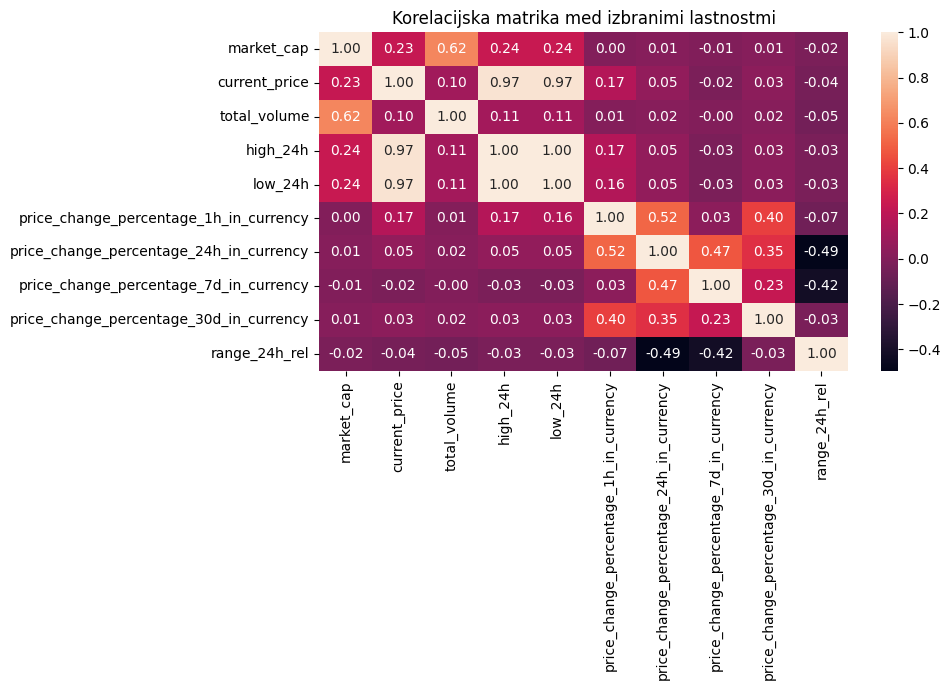

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "market_cap",
    "current_price",
    "total_volume",
    "high_24h",
    "low_24h",
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
    "price_change_percentage_7d_in_currency",
    "price_change_percentage_30d_in_currency",
    "range_24h_rel",
]

corr = df[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Korelacijska matrika med izbranimi lastnostmi")
plt.tight_layout()
plt.show()

##**Regresija**

###**Priprava podatkov za učenje modela**

*Določimo vhodne lastnosti (**vhod**), ki opisujejo trenutno stanje trga kriptovalut, ter izhodno spremenljivko (**izhod**), ki predstavlja 7-dnevno spremembo cene.*

In [79]:
vhod = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
    ]
]
izhod = df["price_change_percentage_7d_in_currency"]

*Razdelimo podatke na učno in testno množico. Učna množica se uporabi za učenje modela, testna pa za preverjanje, kako dobro se model nauči na novih podatkih.*

In [80]:
from sklearn.model_selection import train_test_split

#Razdekitev na ucno in testno mnozico
x_train, x_test, y_train, y_test = train_test_split(
    vhod, izhod, test_size=0.2, random_state=42
)

###**Linearna regresija**

*Uporabimo algoritem **linearna** regresija, s katerim model naučimo povezavo med vhodnimi lastnostmi in izhodno spremenljivko. Model nato uporabimo za napoved na testnih podatkih in njegovo uspešnost ocenimo z metrikama **MAE** in **R²**.*

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Uporaba algoritma
lin_reg = LinearRegression()

#Učenje modela
lin_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_lin = lin_reg.predict(x_test)

# Metrike za vrednotenje uspešnosti modela
mae_lin = mean_absolute_error(y_test, rez_lin)
r2_lin = r2_score(y_test, rez_lin)

print("Linearna regresija")
print("MAE:", mae_lin)
print("R2:", r2_lin)

Linearna regresija
MAE: 0.46717642279927285
R2: -0.504313620369919


###**Naključni gozd regresija**

*Uporabimo algoritem **Random Forest** regresija, ki temelji na več odločitvenih drevesih. Model naučimo na učnih podatkih, nato pa ocenimo njegovo uspešnost na testnih podatkih z metrikama **MAE** in **R²**.*

In [82]:
from sklearn.ensemble import RandomForestRegressor

#Uporaba algoritma
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

#Učenje modela
rf_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_rf = rf_reg.predict(x_test)

# Metrike za vrednotenje uspešnosti modela
mae_rf = mean_absolute_error(y_test, rez_rf)
r2_rf = r2_score(y_test, rez_rf)

print("Naključni gozd regresija")
print("MAE:", mae_rf)
print("R2:", r2_rf)

Naključni gozd regresija
MAE: 0.45735750745731735
R2: -0.2516550876779433


###**Rezultati regresijskih modelov**

*Primerjamo uspešnost **linearne** regresije in **Random Forest** regresije. Na podlagi metrik **MAE** in **R²**.*

*Metriki smo izbrali, ker skupaj omogočata jasno oceno natančnosti napovedi in splošne uspešnosti regresijskega modela.*

*   **`mean_absolute_error` (povprečna absolutna napaka)**--> meri povprečno absolutno razliko med dejanskimi in napovedanimi vrednostmi.


*   **`r2_score` (koeficient determinacije)** --> pove, kako dobro model pojasni razpršenost podatkov, pri čemer višja vrednost pomeni boljše prileganje modela podatkom.

In [83]:
print("Primerjava modelov")
print("Linearna regresija → MAE:", mae_lin, "R2:", r2_lin)
print("Naključni gozd → MAE:", mae_rf, "R2:", r2_rf)

Primerjava modelov
Linearna regresija → MAE: 0.46717642279927285 R2: -0.504313620369919
Naključni gozd → MAE: 0.45735750745731735 R2: -0.2516550876779433


##**Klascifikacija**

###**Pripava podatkov za ucenje modela**

Določimo **vhodne** lastnosti, ki opisujejo trenutno stanje kriptovalute in trga. **Izhodno** spremenljivko pripravimo za klasifikacijo, tako da 7-dnevno spremembo cene pretvorimo v razreda **rast (1)** ali **padec (0)**.

In [84]:
vhod = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
    ]
]

#rast (1) ali padec (0)
izhod = (df["price_change_percentage_7d_in_currency"] > 0).astype(int)

izhod.value_counts()

,count
price_change_percentage_7d_in_currency,
1,151
0,149


*Razdelimo podatke na učno in testno množico, ki ju uporabimo za učenje in preverjanje klasifikacijskega modela. S tem zagotovimo, da uspešnost modela ocenjujemo na podatkih, ki jih model med učenjem še ni videl.*

In [85]:
from sklearn.model_selection import train_test_split

#Razdekitev na ucno in testno mnozico
x_train, x_test, y_train, y_test = train_test_split(
    vhod, izhod, test_size=0.2, random_state=42
)

###**Logisticna regresija**

*V tem delu kode uporabimo logistično regresijo za reševanje problema klasifikacije, kjer napovedujemo, ali bo cena kriptovalute zrasla ali padla. Model naučimo na učnih podatkih in ga nato uporabimo za napoved razredov na testnih podatkih.*

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Uporaba algoritma
log_reg = LogisticRegression(max_iter=1000)

#Učenje modela
log_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_log = log_reg.predict(x_test)

###**Točnost klasifikacijskega modela**

*Ocenimo uspešnost klasifikacijskega modela z metriko točnost.*

* `accuracy_score`(točnost) --> pove, kolikšen delež primerov je model pravilno razvrstil v razreda rast ali padec cene.

In [87]:
# Izračun točnosti klasifikacijskega modela
acc = accuracy_score(y_test, rez_log)

print("Logistična regresija – klasifikacija")
print("Točnost (accuracy):", acc)

Logistična regresija – klasifikacija
Točnost (accuracy): 0.6166666666666667


###**Interaktivna napoved rasti ali padca kriptovalute**

*Uporabnik **sam izbere** kriptovaluto, za katero želimo narediti napoved. Na podlagi **naučenega** klasifikacijskega modela se izpiše verjetnost, ali bo cena izbrane kriptovalute v naslednjih 7 dneh **zrasla** ali **padla**.*

In [88]:
import pandas as pd

# vhodne lastnosti(enake kot pri učenju)
lastnosti = [
    "market_cap",
    "total_volume",
    "current_price",
    "range_24h_rel",
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
]

def napovej_verjetnost(coin_id):

    # preverimo, ali kriptovaluta obstaja v podatkih
    if coin_id not in df.index:
        print("Kriptovaluta ne obstaja v podatkih.")
        return

    # pripravimo vhod
    vhod = pd.DataFrame(
        [df.loc[coin_id, lastnosti]],
        columns=lastnosti
    )

    # izračun verjetnosti
    verjetnosti = log_reg.predict_proba(vhod)[0]

    print(f"Kriptovaluta: {coin_id}")
    print(f"Verjetnost PADCA v 7 dneh: {verjetnosti[0]:.2f}")
    print(f"Verjetnost RASTI v 7 dneh: {verjetnosti[1]:.2f}")

# ===== uporaba =====
coin_id = input("Vnesi ID kriptovalute (npr. solana): ").strip().lower()
napovej_verjetnost(coin_id)


Vnesi ID kriptovalute (npr. solana): ripple
Kriptovaluta: ripple
Verjetnost PADCA v 7 dneh: 0.62
Verjetnost RASTI v 7 dneh: 0.38


*Model smo naučili na podatkih vseh kriptovalut, saj posamezna kriptovaluta ne vsebuje dovolj podatkov za samostojno učenje modela. Čeprav se kriptovalute med seboj razlikujejo, model zajame skupne lastnosti trga, ki vplivajo na kratkoročno gibanje cen.*

##**Gručenje**

###**Metoda komolca**

In [89]:

dfG = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
        "price_change_percentage_7d_in_currency",
    ]
]

dfG.head()

,market_cap,total_volume,current_price,range_24h_rel,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
id,,,,,,,
bitcoin,16.757106,8.507010,4.185824,0.038631,0.013610,0.076206,-0.094778
ethereum,3.327620,4.484327,-0.108537,0.046212,-0.133840,0.140036,-0.169572
tether,1.706828,14.115219,-0.258016,0.003313,0.136695,0.246044,0.056205
binancecoin,1.035252,0.078545,-0.214636,0.026947,0.033526,0.068756,0.002306
ripple,0.983010,0.238740,-0.257972,0.038217,-0.110753,0.039410,-0.267737


*Elbow metodo smo uporabili za določitev optimalnega števila gruč pri algoritmu KMeans. Metoda temelji na opazovanju inercije, ki meri znotrajgručne razdalje, in išče točko, kjer se zmanjševanje inercije začne upočasnjevati.*

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercije = []
k_vrednosti = range(1, 11)

for k in k_vrednosti:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(dfG)
    inercije.append(kmeans.inertia_)


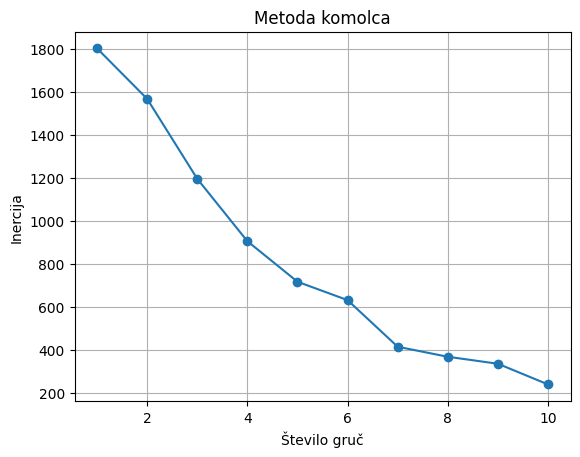

In [91]:
plt.plot(k_vrednosti, inercije, marker='o')
plt.xlabel('Število gruč')
plt.ylabel('Inercija')
plt.title('Metoda komolca')
plt.grid(True)
plt.show()

*Na grafu Elbow metode je viden izrazit “komolec” pri štirih gručah, saj se po tej vrednosti zmanjševanje inercije bistveno upočasni. Zato smo kot optimalno število gruč izbrali k = 4.*

###**Hierarhično gručenje**

*Dendrogram smo uporabili za hierarhično gručenje kriptovalut in dodatno preverjanje optimalnega števila gruč.*

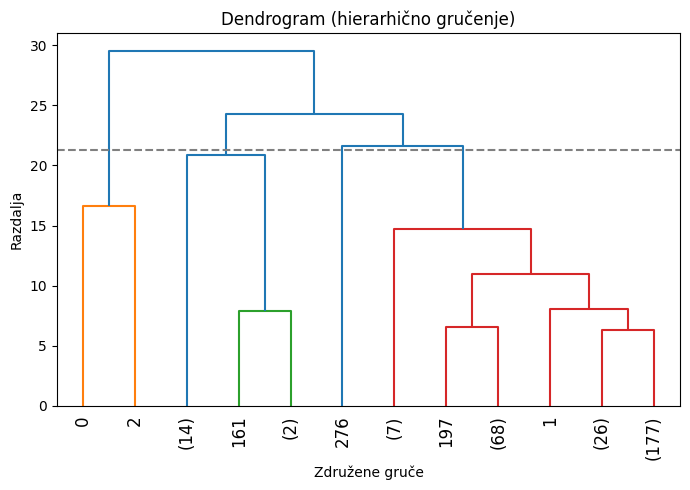

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage

razdalje = linkage(dfG, method='ward')

nivoji = 12

plt.figure(figsize=(7, 5))
dendrogram(razdalje,
           p=nivoji,
           truncate_mode="lastp",
           leaf_rotation=90);

visina_reza = 21.3

plt.axhline(y=visina_reza,
            linestyle="--",
            color="gray"
)

plt.title("Dendrogram (hierarhično gručenje)")
plt.xlabel("Združene gruče")
plt.ylabel("Razdalja")
plt.tight_layout()
plt.show()


*Na dendrogramu je viden večji preskok razdalje pri združevanju gruč, kar nakazuje na naravno delitev podatkov. Na tej podlagi lahko potrdimo izbiro štirih gruč, ki smo jo predhodno določili z Elbow metodo.*

###**KMeans**

*Z algoritmom KMeans smo kriptovalute razdelili v štiri gruče, pri čemer vsaka kriptovaluta dobi oznako gruče glede na svojo podobnost z drugimi.*

In [100]:
from sklearn.cluster import KMeans

optimalno = 4

kmeans = KMeans(n_clusters=optimalno, random_state=0)

gruče = kmeans.fit_predict(dfG)

df["cluster"] = gruče

df["cluster"].value_counts()

,count
cluster,
2,206
0,90
1,3
3,1


*KMeans algoritem je razdelil kriptovalute v štiri gruče, pri čemer ena gruča vsebuje večino primerkov, medtem ko ostale gruče predstavljajo manjše skupine ali posamezne izstopajoče kriptovalute. To nakazuje, da so nekatere kriptovalute po tržni kapitalizaciji, volumnu ali nihanjih cen bistveno drugačne od preostalega trga.*

###**PCA**

*PCA omogoča vizualizacijo več-dimenzionalnih podatkov v dveh dimenzijah.*

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_komponente = pca.fit_transform(dfG)

# shranimo PCA komponente
df["PCA1"] = pca_komponente[:, 0]
df["PCA2"] = pca_komponente[:, 1]

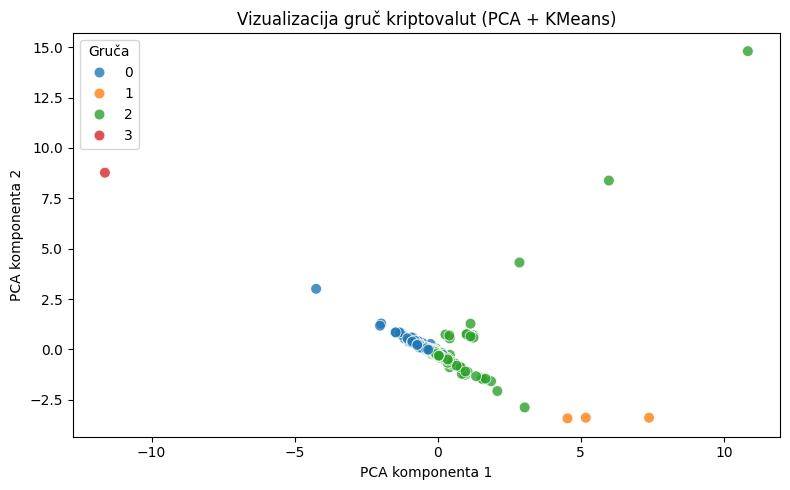

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="cluster",
    palette="tab10",
    s=60,
    alpha =0.8
)

plt.title("Vizualizacija gruč kriptovalut (PCA + KMeans)")
plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.legend(title="Gruča")
plt.tight_layout()
plt.show()


*Čeprav se nekatere gruče na PCA grafu delno prekrivajo, to ne pomeni, da gručenje ni pravilno. PCA prikazuje podatke le v dveh dimenzijah, medtem ko je gručenje izvedeno v več-dimenzionalnem prostoru, kjer so razlike med gručami bolj izrazite.*

###**Analiza gručenja**

*Kriptovalute razdelimo v skupine glede na pripadajočo gručo in za vsako gručo izračuna povprečne vrednosti izbranih lastnosti.*

In [103]:
povprecja_gruc = df.groupby("cluster")[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
        "price_change_percentage_7d_in_currency",
    ]
].mean()

povprecja_gruc

,market_cap,total_volume,current_price,range_24h_rel,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
cluster,,,,,,,
0,-0.087282,-0.102315,-0.249254,0.064696,-0.228698,-0.610419,-0.402503
1,-0.093299,-0.112233,1.327574,0.200677,8.132054,3.723017,-1.081840
2,0.039974,0.046895,0.090816,0.036261,0.003521,0.266864,0.236937
3,-0.099420,-0.115262,-0.258066,0.749113,-4.538576,-11.205232,-9.338132


* **Gruča 0** vključuje kriptovalute z nižjimi vrednostmi `market_cap`, `total_volume` in `current_price`.

* **Gruča 1** se razlikuje predvsem po zelo visokem `price_change_percentage_1h_in_currency` in pozitivnem `price_change_percentage_24h_in_currency`, ob hkrati negativnem `price_change_percentage_7d_in_currency`.

* **Gruča 2** izstopa zaradi nekoliko višjih vrednosti `market_cap` in `total_volume`.

* **Gruča 3** se jasno razlikuje po izrazito negativnih `price_change_percentage_1h_in_currency`, `price_change_percentage_24h_in_currency` in `price_change_percentage_7d_in_currency `ter povišani `range_24h_rel`.